<a href="https://colab.research.google.com/github/OH1107/aisa_edu/blob/master/ML/ML_3%EC%9D%BC%EC%B0%A8_20200820_HousePrice%EC%8B%9C%EA%B0%81%ED%99%94_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 사전 준비작업



- 구글 드라이브 마운트

In [ ]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# 경로 이동
%cd drive/'My Drive'/'Colab Notebooks'/'ML_Project'/'house_price'

/content/drive/My Drive/Colab Notebooks/ML_Project/house_price


In [ ]:
# 현재 경로의 파일 확인
%ls

sample_submission.csv  test.csv  train.csv


In [ ]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from IPython.core.display import display, HTML
from pandas_profiling import ProfileReport

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

## 2. 데이터 임포트
- House Price 데이터 가져오기


In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

- 데이터 확인

In [ ]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [ ]:
display(train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

- 그 다음 확인해야 하는 것은 Numerical 변수와 Categorical 변수를 구분한다.
  + 먼저 numerical_features를 구분하자.

In [ ]:
numeric_features = train.select_dtypes(include=[np.number])
print(numeric_features.columns)
print("The total number of numeric features are: ", len(numeric_features.columns))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
The total number of numeric features are:  38


- Numerical 변수를 제외한 나머지 변수를 구분하자

In [ ]:
categorical_features = train.select_dtypes(exclude=[np.number])
print(categorical_features.columns)
print("The total number of numeric features are: ", len(categorical_features.columns))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
The total number of numeric features are:  43


## 3. 연도 데이터 탐색
- 각 데이터에서 categorical_features와 numeric_features를 각각 추출하는 하였다

- 이 중에서, 우선 numeric_features를 다시 살펴본다.

- 우선 훈련데이터의 ID는 삭제한다. (값만 커지는 의미 없는 데이터)

- 또한, 종속변수인 salesprice는 테스트 데이터에는 존재하지 않는다.
  + 그럼 결과적으로 36개의 numeric_features만 남게 된다.

- 여기에서 유심히 살펴보면 Year과 관련된 features가 보인다.
- 특히 매출과 관련된 데이터를 다루는데 있어서, 연,월,일은 매우 중요하다. 패턴을 찾아서 특정 변수만 추출하는 코드가 필요하다.

- YearBuilt, YearRemodAdd, GarageYrBlt, YrSold만 추출해보자.

In [ ]:
year_fea = [fea for fea in numeric_features if 'Yr' in fea or 'Year' in fea]
print(year_fea)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


### 1. 연도의 변수 처리 방법
- 각 변수는 다음과 같다.
  + YearBuilt: Original construction date
  + YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
  + GarageYrBlt: Year garage was built
  + YrSold: Year Sold (YYYY)

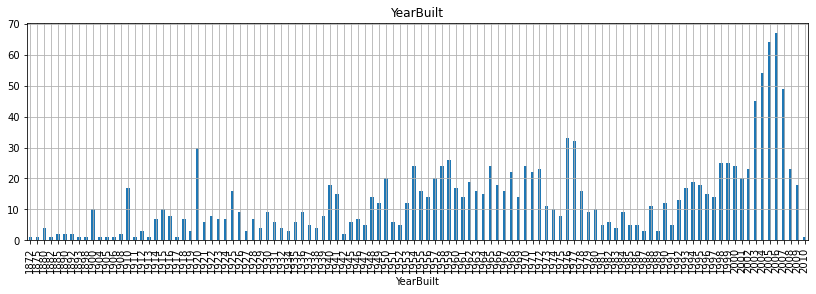

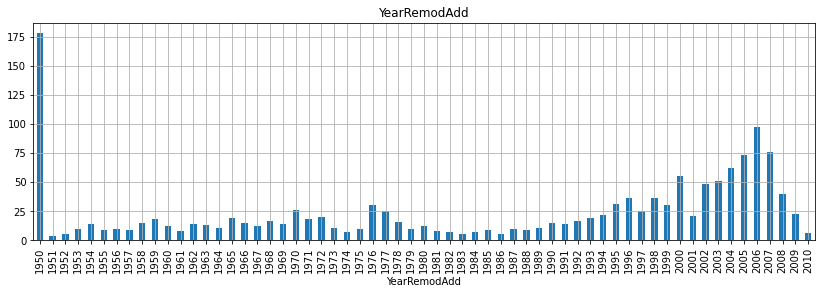

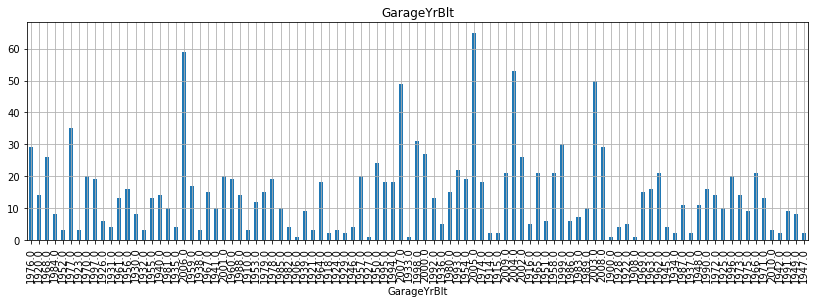

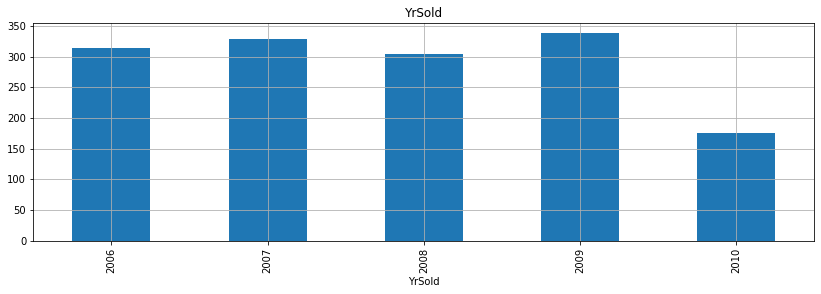

In [ ]:
for fea in year_fea:
  data = train.copy()
  data[fea].value_counts(sort=False).plot(kind='bar')
  plt.xlabel(fea)
  plt.title(fea)
  plt.show()

- 위 그래프를 통해
  + 첫 건축 시기는 1872년이고 첫 리모델링 시기는 1950년이고, 마지막으로 첫 차고 건축시기는 1976년으로 확인된다.
  + 그리고 매매 시기는 2006-2010년 사이로 집계된 것으로 확인할 수 있다.

### 2. SalesPrice와의 관계
- 조금 의미있는 변수를 만들어야 한다. (위 4가지 변수의 조합)
- 보통 실무에서는 이를 도출변수라고 하는데.. 이 부분은 나중에...
- 여기서 강사가 하고자 하는 것은 YrSold에서 그 외 다른 변수와의 연도 시기의 - 차이를 계산하면 통상적으로 연수가 짧으면 짧을수록 매매가도 올라가고 연수가 길면 길수록 매매가가 하락하는 것을 예상할 수 있다.
- 실제 그러한 그래프를 그리도록 해보자.


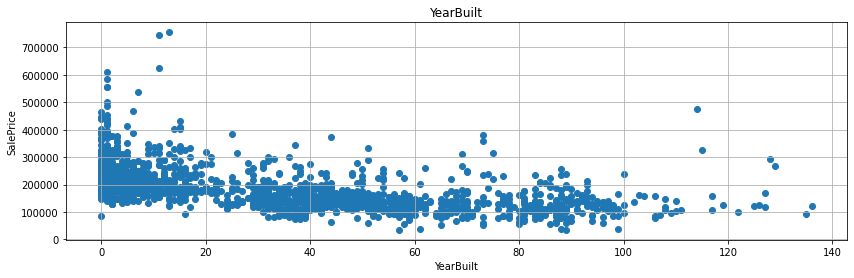

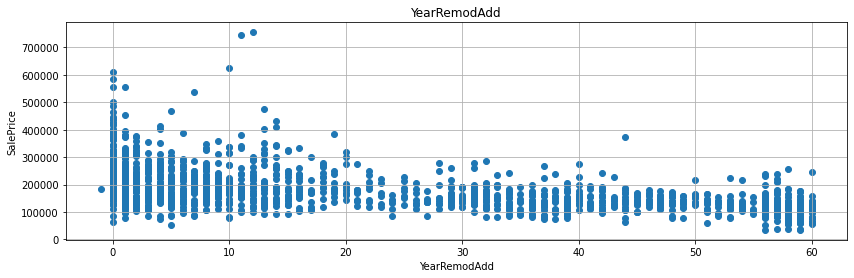

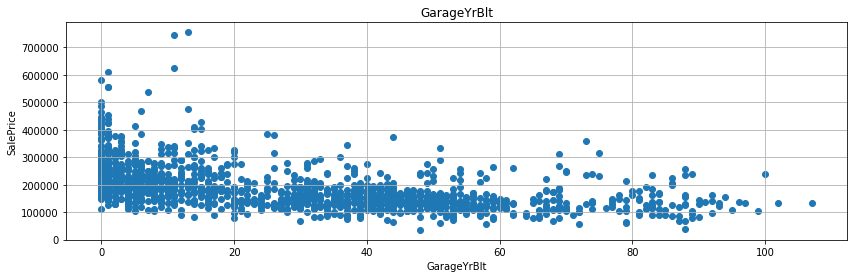

In [ ]:
for fea in year_fea:
    if fea!='YrSold': # `YrSold` 변수는 제외 한다.
        data=train.copy() # 이렇게 해주는 것이 좋다. (원본 데이터는 늘 보존할 수 있다)
        data[fea]=data['YrSold']-data[fea] #  여기가 사실 핵심 포인트다. 연수 차이 계산
        plt.scatter(data[fea], data['SalePrice']) # 산점도 그래프를 그린다.
        plt.title(fea)
        plt.xlabel(fea)
        plt.ylabel('SalePrice')
        plt.show()

## 4. 양적 변수 시각화 - 이산형 그래프

### 1. 가상의 데이터 생성
- 본 데이터를 다루기 전, 가상의 데이터를 가지고 실습을 통해 이해를 돕고자 한다.

In [ ]:
# discrete dataframe - 이산형 변수
temp = pd.DataFrame({'id' : [1,2,3,4,5,6,7,8,9,10],
                    'number_of_room' : [2,4,3,2,4,3,3,3,4,2],
                    'SalePrice' : [1000,1300,2000,1030,2030,2050,2000,5000,3000,3500]
                    })
print(temp)

   id  number_of_room  SalePrice
0   1               2       1000
1   2               4       1300
2   3               3       2000
3   4               2       1030
4   5               4       2030
5   6               3       2050
6   7               3       2000
7   8               3       5000
8   9               4       3000
9  10               2       3500


- 우선, number_of_room의 데이터의 시각화를 작성하면 아래와 같다.
  - 이 때 작성해야 하는 그래프는 막대 그래프가 필요하다.
  - 우선, matplotlib 형태로 작성한다.

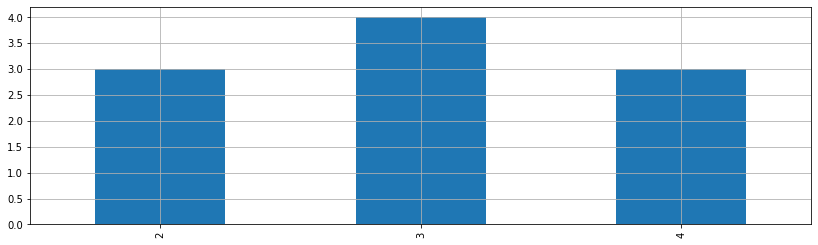

In [ ]:
temp['number_of_room'].value_counts(sort=False).plot.bar()
plt.show()

- 이번에는 seaborn 방식으로 그래프를 작성한다.

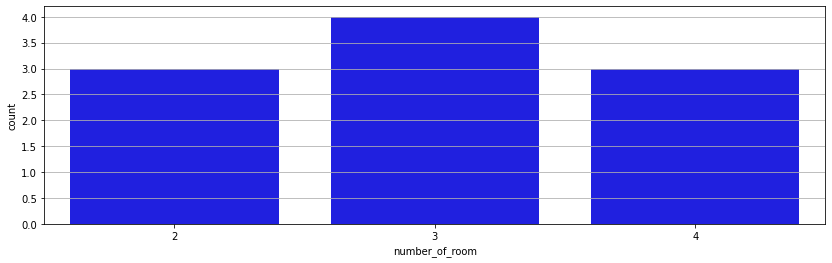

In [ ]:
sns.countplot(
    data= temp,
    x= "number_of_room", 
    color='blue'
)
plt.show()

- 이산형 그래프를 단독으로 그래프를 그릴 때는 *막대그래프*가 필요하며 개수가 *count*가 되는 것만 기억한다.

### 2. 이산형 변수와 SalePrice
- 앞서서 설명했지만, SalePrice와 number_of_room과의 관계 그래프가 중요하다.
- 이럴 때 필요한 그래프는 보통 boxplot그래프다.

- boxplot에 대한 이해 필요

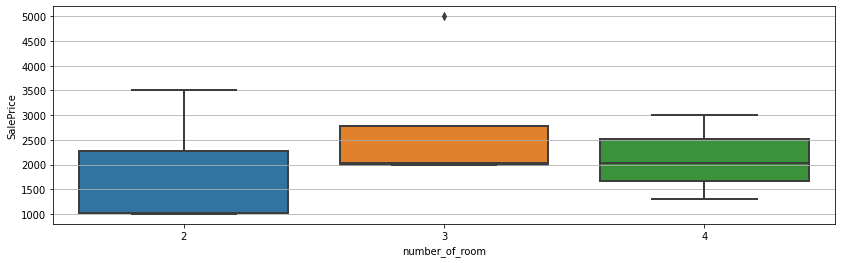

In [26]:
sns.boxplot(x = "number_of_room", y = "SalePrice", data = temp)
plt.show()

### 3. 실무 데이터 적용
- 실 데이터에 적용하고자 한다.
- 하지만 numeric_features에서 연속형 데이터와 이산형 데이터를 구분해야 한다.
어떻게 구분할까?
- 가장 좋은 방법은 일일이 데이터를 확인해서 추출하는 방법이다.
- 그러나, 실무에서는 그렇게 할 수가 없다.
- unique()함수를 사용한다. 즉 유일한 값을 뽑는데, 그 개수가 50개 이상이면 연속형으로 보고, 그 이하면 discrete로 판단한다.
- 이 때, year_fea와 id는 같이 제거한다.

In [27]:
discrete_vars=[fea for fea in numeric_features if len(train[fea].unique()) < 50 and fea not in year_fea + ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_vars)))

Discrete Variables Count: 17


- 이제 시각화를 작성하는데, boxplot으로 작성한다.

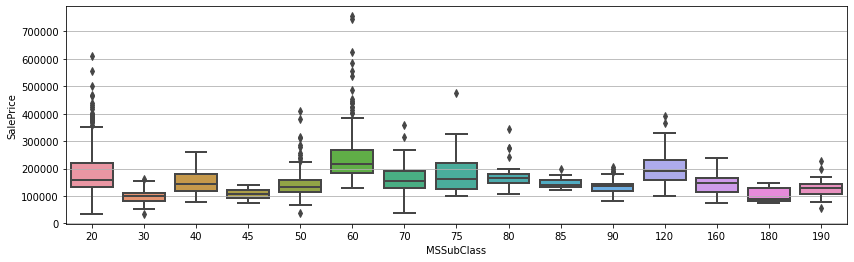

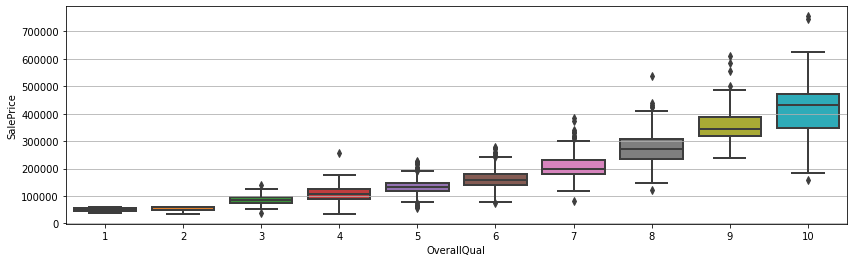

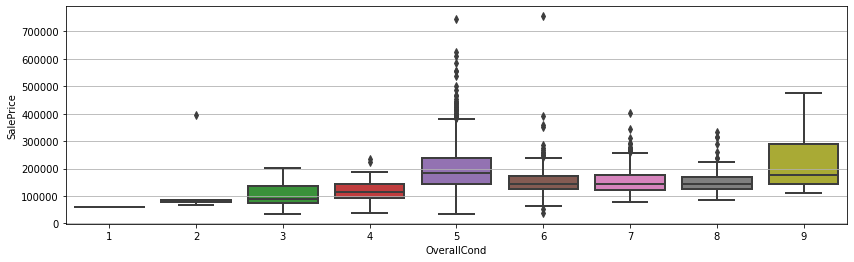

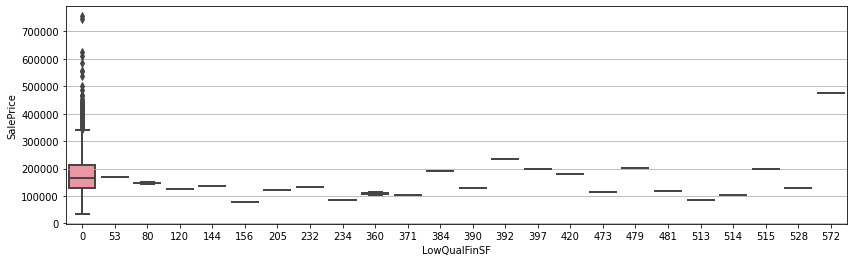

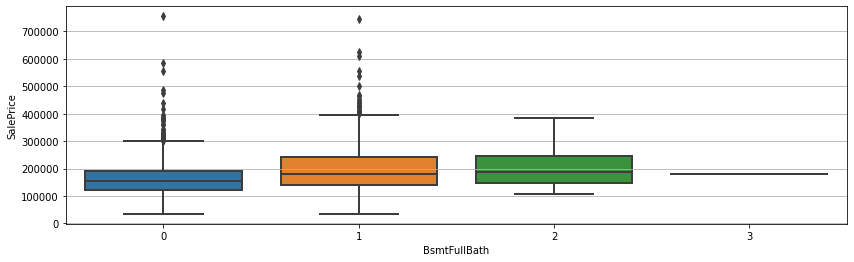

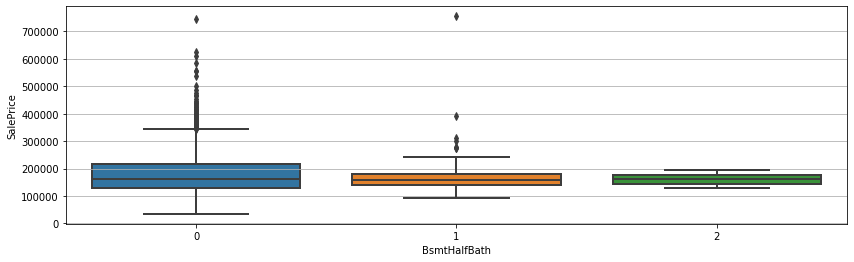

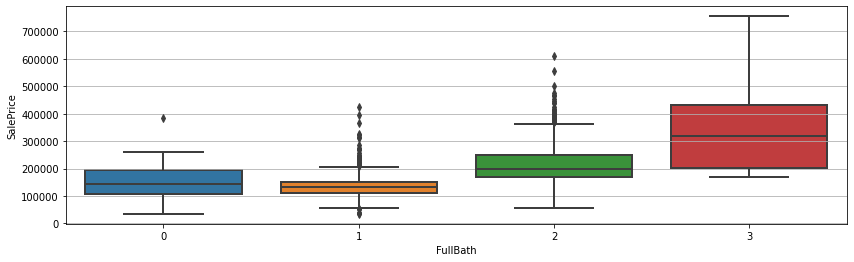

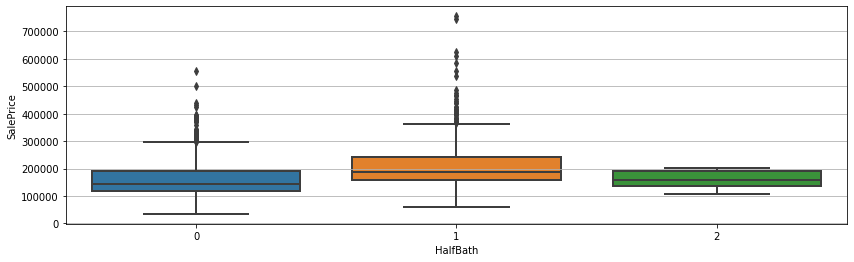

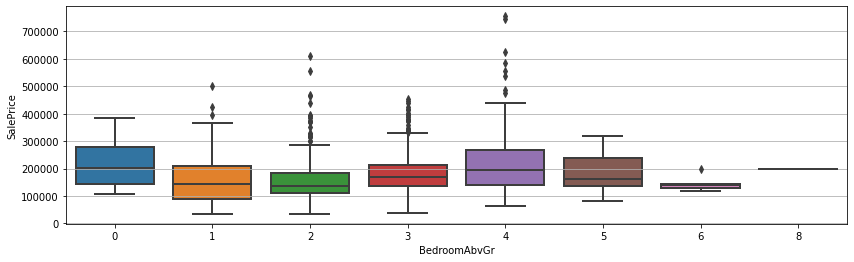

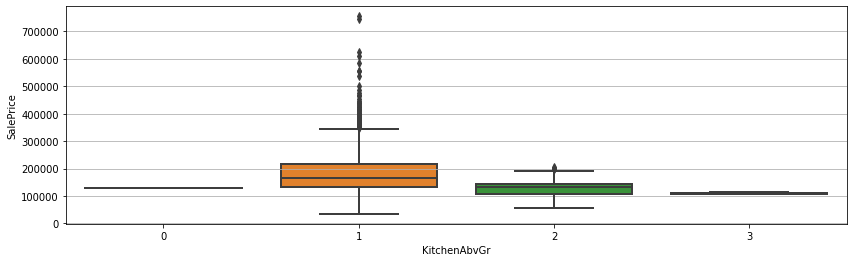

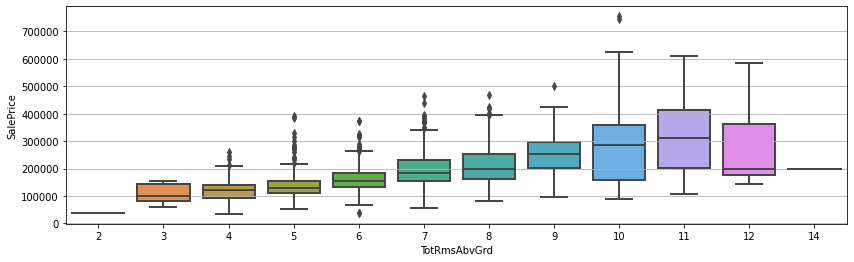

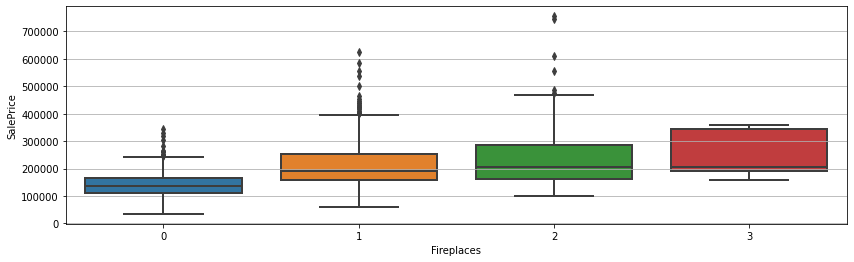

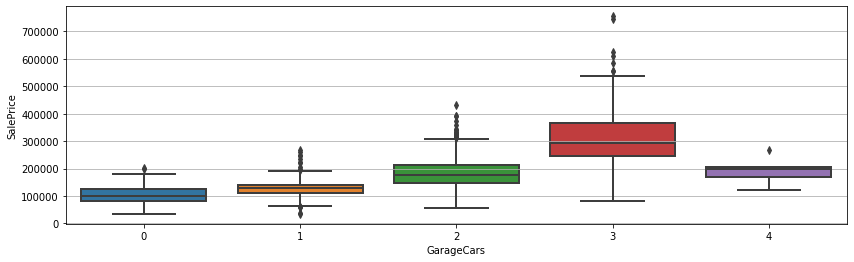

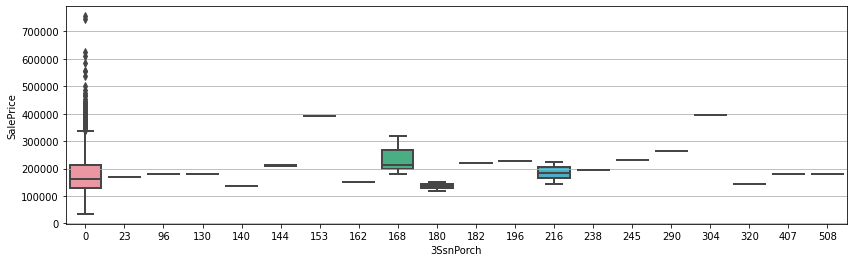

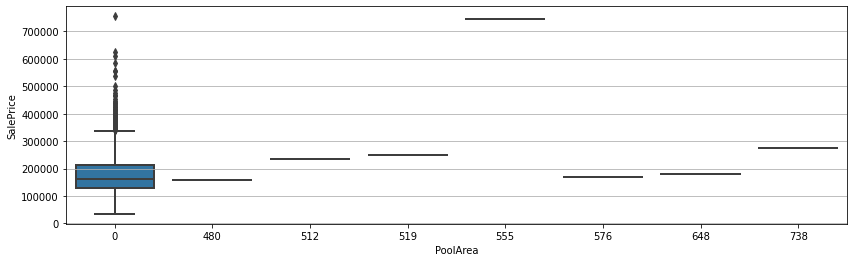

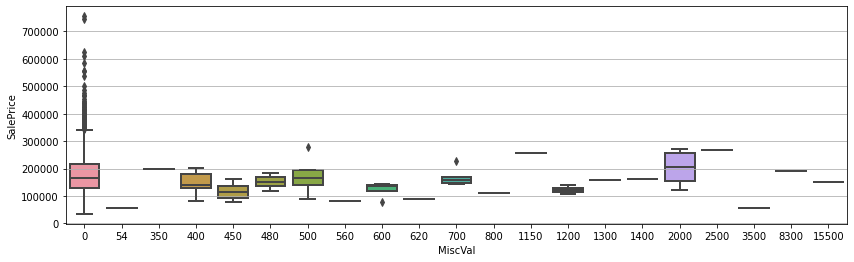

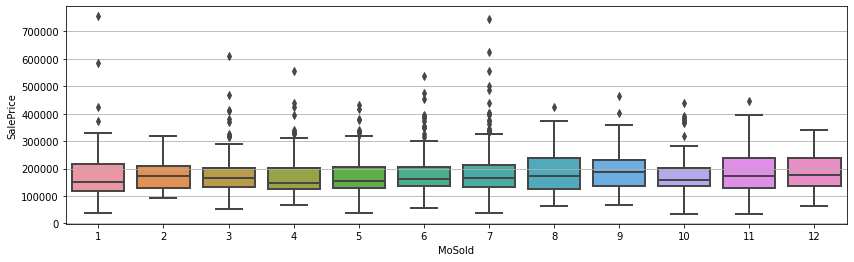

In [28]:
for fea in discrete_vars:
  data = train.copy()
  sns.boxplot(x = fea, y='SalePrice', data = data)
  plt.show()

- 총 17개의 boxplot 그래프가 출력되었다.
- 그럼 여기에서 무엇을 봐야할까?
  + 우선, 도움이 되지 않는 그래프는 제거하는게 좋다. 
    + 구분이 되지 않는 것, 그리고, 값이 나타나지 않는 것은 boxplot에서 제거한다.

Discrete Variables Count: 13


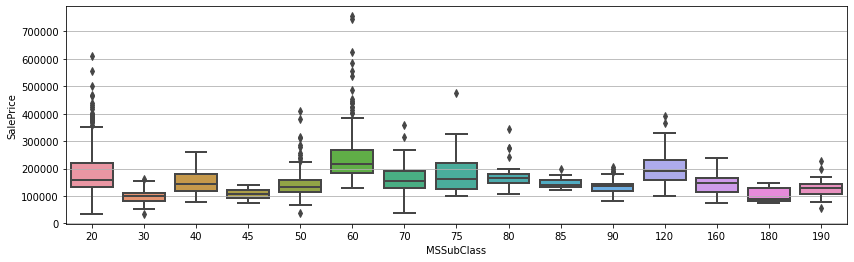

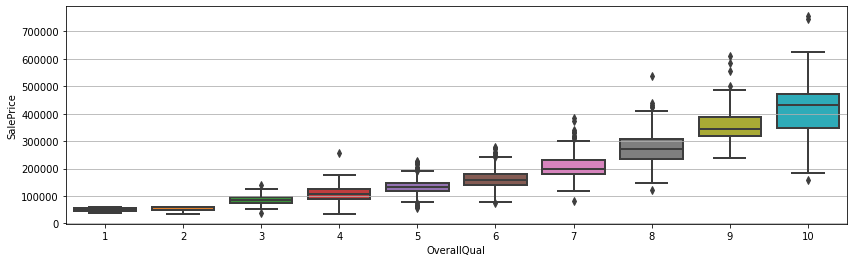

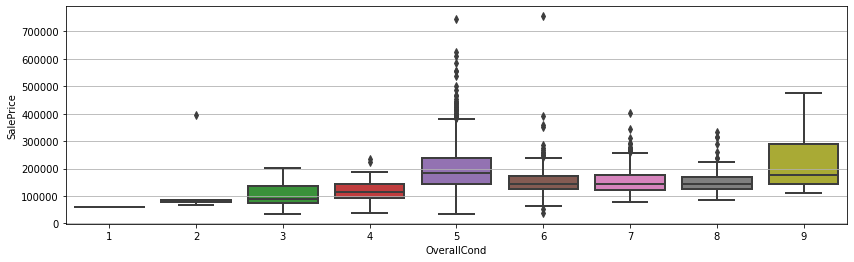

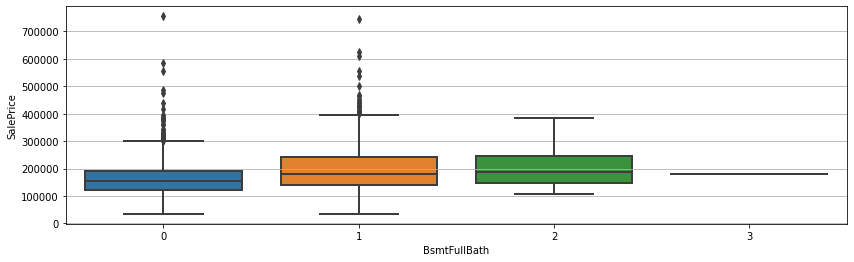

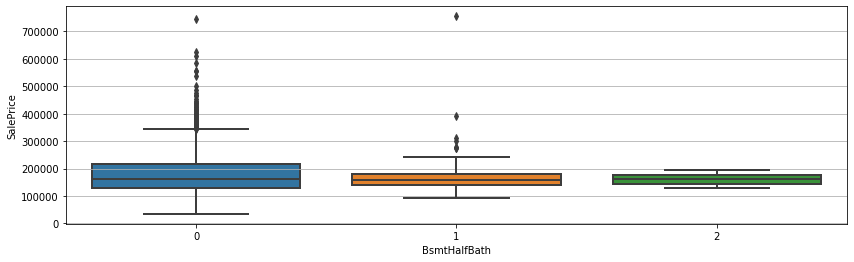

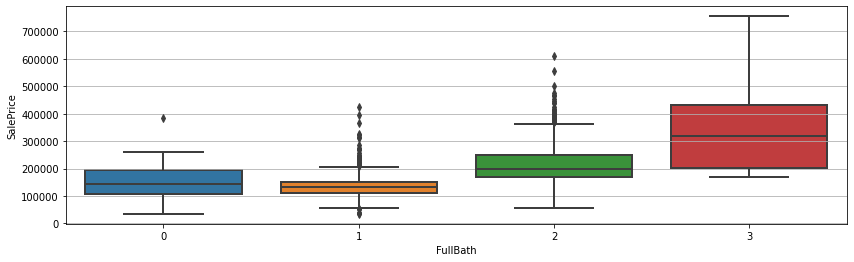

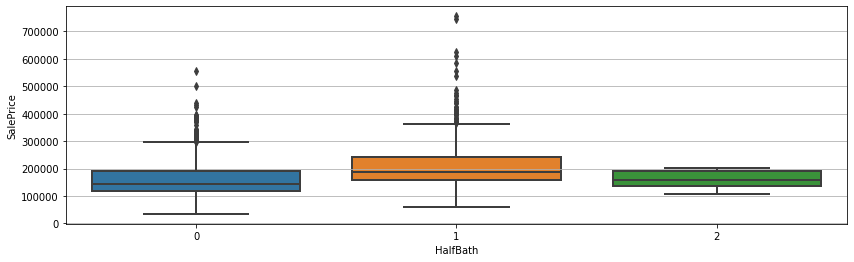

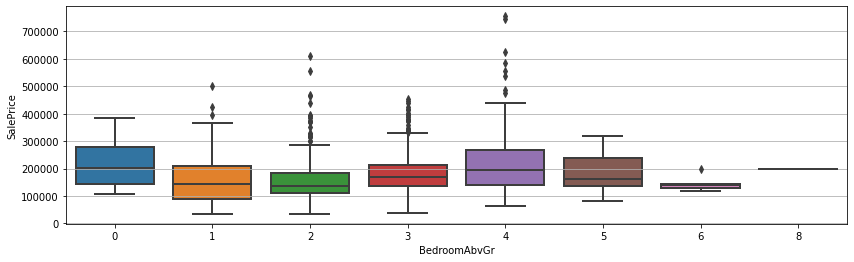

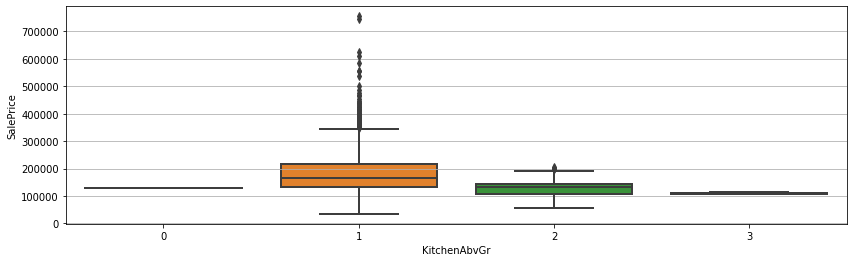

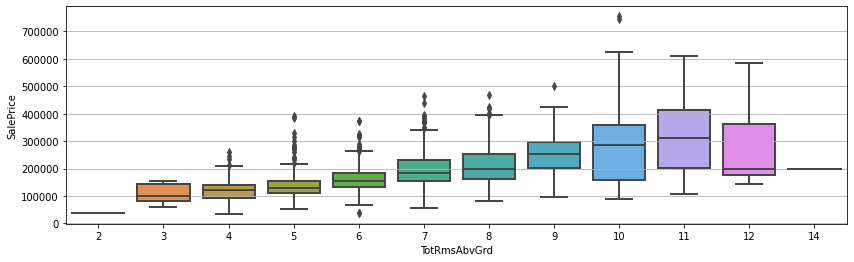

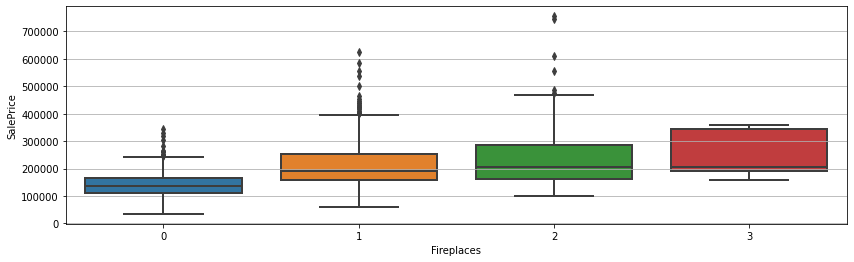

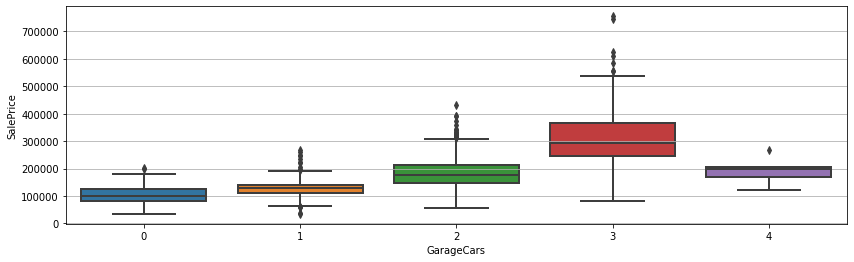

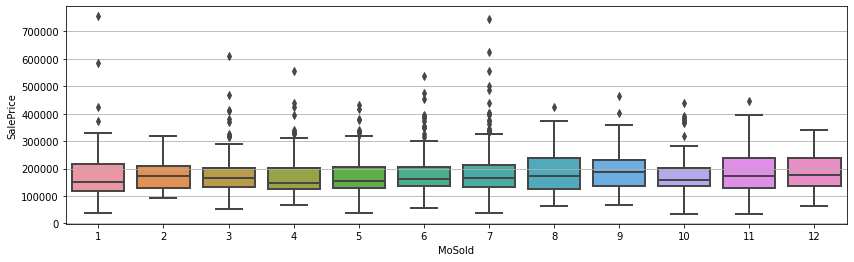

In [29]:
rem_vars = ['PoolArea', 'LowQualFinSF', 'MiscVal', '3SsnPorch']
discrete_vars=[fea for fea in numeric_features if len(train[fea].unique()) < 50 and fea not in year_fea + rem_vars + ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_vars)))

for fea in discrete_vars:
  data = train.copy()
  sns.boxplot(x = fea, y='SalePrice', data = data)
  plt.show()

## 5. 양적 변수 시각화 - 연속형 그래프
- 이번에는 수치형 변수중에서 연속형 그래프를 작성하려고 한다.
- 먼저 가상 데이터를 생성해서 간단하게 SalePrice와 관련된 그래프는 어떻게 작성해야 하는지 확인해본다.

### 1. 가상의 데이터 생성

- 먼저 가상 데이터를 생성해서 간단하게 SalePrice와 관련된 그래프는 어떻게 작성해야 하는지 확인해본다.

In [30]:
# discrete dataframe
LotArea = train['LotArea'].iloc[0:10]
temp = pd.DataFrame({'id' : [1,2,3,4,5,6,7,8,9,10],
                    'LotArea' : LotArea,
                    'SalePrice' : [1000,1300,2000,1030,2030,2050,2000,5000,3000,3500]
                    })
print(temp)

   id  LotArea  SalePrice
0   1     8450       1000
1   2     9600       1300
2   3    11250       2000
3   4     9550       1030
4   5    14260       2030
5   6    14115       2050
6   7    10084       2000
7   8    10382       5000
8   9     6120       3000
9  10     7420       3500


### 2. 산점도 그래프
- SalePrice와 LotArea 모두 연속형 변수이다. 이럴 때 보통 산점도 그래프를 그리는데, 산점도의 자세한 사항은 교재 설명을 참고한다.
- 먼저 matplotlib 방식으로 산점도를 작성해본다.

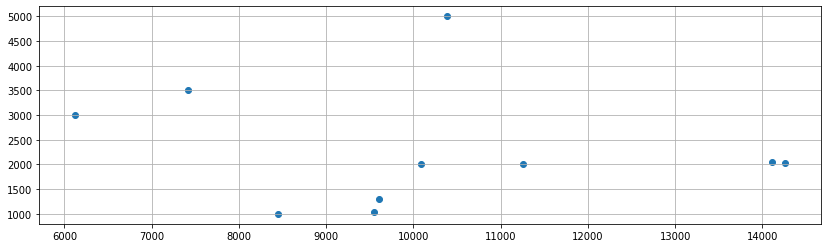

In [31]:
plt.scatter(x=temp['LotArea'], y = temp['SalePrice'])
plt.show()

- 그리고 seaborn 방식으로도 작성해본다.

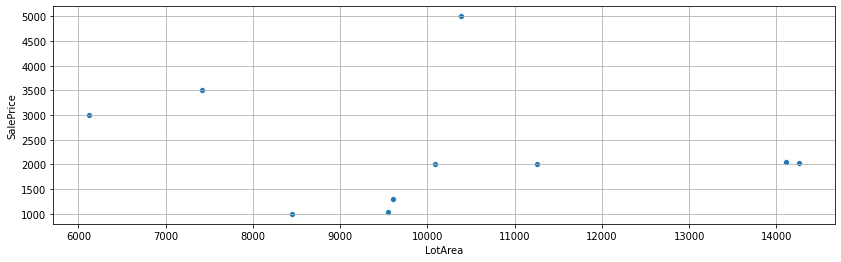

In [32]:
sns.scatterplot(x='LotArea', y='SalePrice', data = temp)
plt.show()

### 3. 실무 데이터 적용
- 먼저 연속형 변수를 추출한다.

In [33]:
continuous_vars = [fea for fea in numeric_features if fea not in discrete_vars + year_fea + ['Id'] + ['SalePrice']]
print(continuous_vars)
print("The total number of continuous_vars are: ", len(continuous_vars))


['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
The total number of continuous_vars are:  19


- 이제 산점도 그래프를 작성한다.

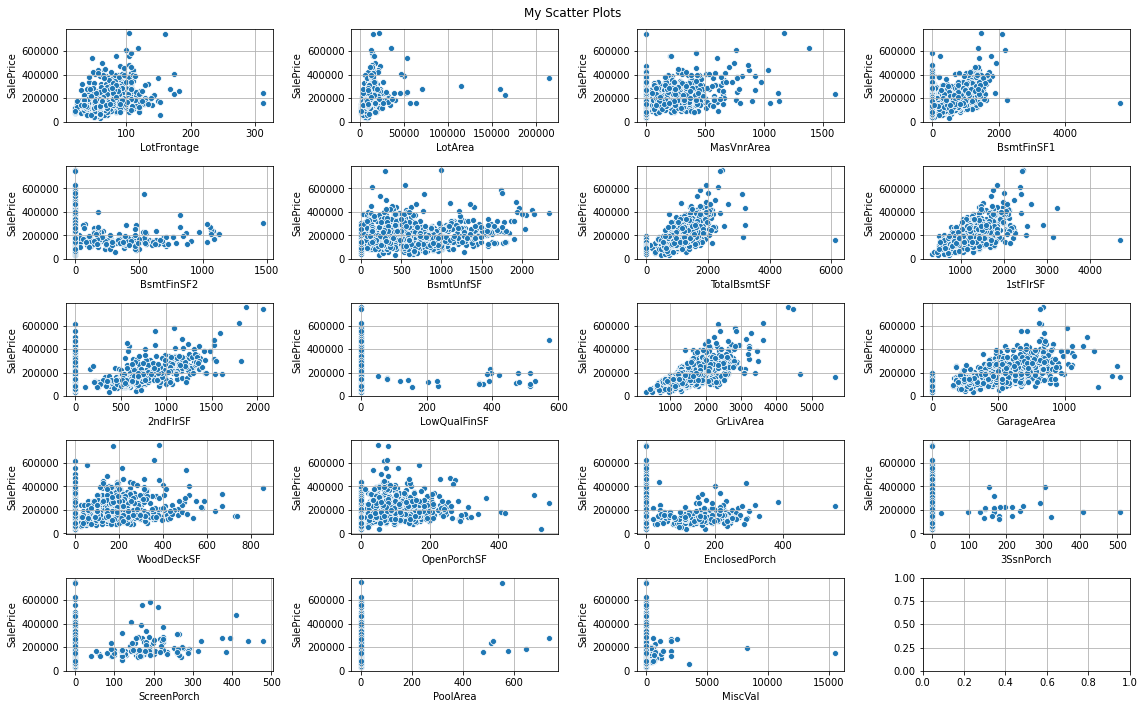

In [34]:
fig, ax = plt.subplots(5, 4, figsize=(16, 10)) # 그래프의 행과 열 지정 및, 이미지 사이즈 지정
data = train.copy()

for i, col in enumerate(data[continuous_vars].columns[0:]): # 좌표 평면 지정
     if i <= 3:
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[0,i]) # 1행 좌표 평면
     elif i <= 7:
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[1,i-4]) # 2행 좌표 평면
     elif i <= 11:
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[2,i-8]) # 3행 좌표 평면
     elif i <= 15:
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[3,i-12]) # 4행 좌표 평면
     else: 
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[4,i-16]) # 5행 좌표 평면

fig.suptitle('My Scatter Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

- 위 소스코드는 전체 continous var의 19개 변수를 각각 그래프 상에 뿌려주도록 한 것이다.
- 그런데, 0이라고 표현된 것이 있다 특히 PoolArea와 같은 변수들인데, 이러한 데이터는 어떻게 처리하는 것이 나을까?
  - 보통 실무에서는 이러한 데이터를 만나면 연속형 변수를 범주형(categorical) 변수로 재범주화 하는 것이 타당하다. (예: zero and over 400)
  - 다만, 이러한 부분은 통계분석 또는 머신러닝을 할 때는 이렇게 연속형 변수를 범주화 해서 진행하는 것도 대안으로 생각할 수 있다.

## 6. 범주형 변수 탐색
- 범주형 변수는 기본적으로 문자들의 집합이다. (지역: 서울, 경기, 인천 등)
  + 문제는, 각 범주마다 개별적인 값의 범위가 천차만별이라는 것이 문제다.

### 1. Unique() 함수를 활용한 유일값 확인
- 다음 코드는 unique() 함수를 적용해서 train 데이터의 각 변수의 유일값이 몇개인지 확인하는 코드를 작성하였다.

In [35]:
for fea in categorical_features:
  data = train.copy()
  unique_category = len(data[fea].unique())
  print("변수 '{fea}'는 유일값 '{unique_category}'개를 가지고 있다.".format(fea = fea, unique_category=unique_category))

변수 'MSZoning'는 유일값 '5'개를 가지고 있다.
변수 'Street'는 유일값 '2'개를 가지고 있다.
변수 'Alley'는 유일값 '3'개를 가지고 있다.
변수 'LotShape'는 유일값 '4'개를 가지고 있다.
변수 'LandContour'는 유일값 '4'개를 가지고 있다.
변수 'Utilities'는 유일값 '2'개를 가지고 있다.
변수 'LotConfig'는 유일값 '5'개를 가지고 있다.
변수 'LandSlope'는 유일값 '3'개를 가지고 있다.
변수 'Neighborhood'는 유일값 '25'개를 가지고 있다.
변수 'Condition1'는 유일값 '9'개를 가지고 있다.
변수 'Condition2'는 유일값 '8'개를 가지고 있다.
변수 'BldgType'는 유일값 '5'개를 가지고 있다.
변수 'HouseStyle'는 유일값 '8'개를 가지고 있다.
변수 'RoofStyle'는 유일값 '6'개를 가지고 있다.
변수 'RoofMatl'는 유일값 '8'개를 가지고 있다.
변수 'Exterior1st'는 유일값 '15'개를 가지고 있다.
변수 'Exterior2nd'는 유일값 '16'개를 가지고 있다.
변수 'MasVnrType'는 유일값 '5'개를 가지고 있다.
변수 'ExterQual'는 유일값 '4'개를 가지고 있다.
변수 'ExterCond'는 유일값 '5'개를 가지고 있다.
변수 'Foundation'는 유일값 '6'개를 가지고 있다.
변수 'BsmtQual'는 유일값 '5'개를 가지고 있다.
변수 'BsmtCond'는 유일값 '5'개를 가지고 있다.
변수 'BsmtExposure'는 유일값 '5'개를 가지고 있다.
변수 'BsmtFinType1'는 유일값 '7'개를 가지고 있다.
변수 'BsmtFinType2'는 유일값 '7'개를 가지고 있다.
변수 'Heating'는 유일값 '6'개를 가지고 있다.
변수 'HeatingQC'는 유일값 '5'개를 가지고 있다.
변수 'CentralAir'는 유일값 '2'개를 가지고 있다.
변수

### 2. 범주형 그래프 시각화
- 그래프는 실제 이산형 그래프와 똑같이 막대 그래프나 boxplot을 작성하면 된다.
- 이 때, categorical_features + SalePrice를 합친 새로운 데이터셋을 만드는 과정이 필요하다.

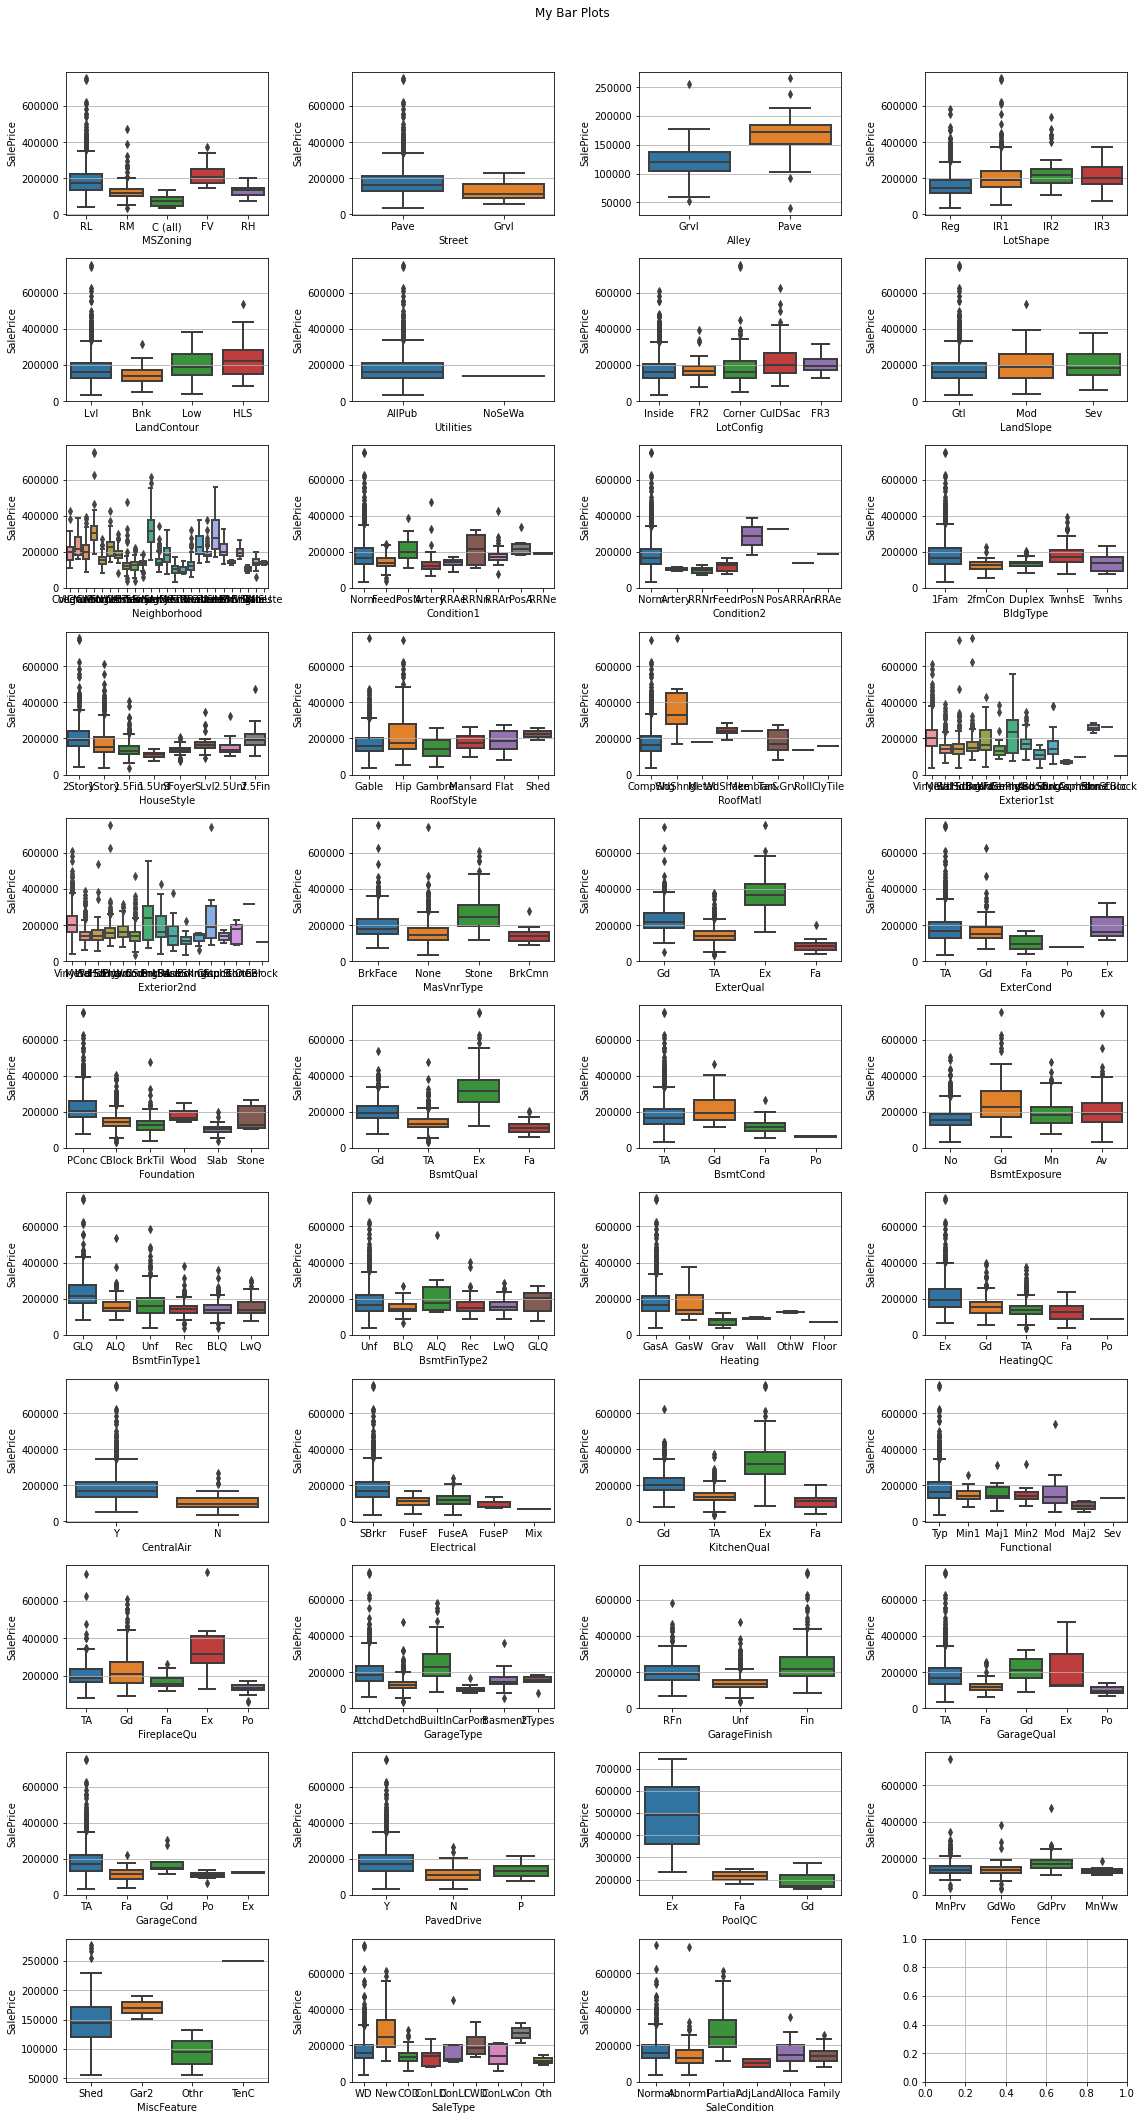

In [36]:
fig, ax = plt.subplots(11, 4, figsize=(16, 30)) # 그래프의 행과 열 지정 및, 이미지 사이즈 지정
data = pd.concat([categorical_features, train['SalePrice']], axis=1) # concat 정의
data.columns[0:]

for i, col in enumerate(data.columns[0:43]): # 좌표 평면 지정
     if i <= 3:
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[0,i]) # 1행 좌표 평면
     elif i <= 7:
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[1,i-4]) # 2행 좌표 평면
     elif i <= 11:
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[2,i-8]) # 3행 좌표 평면
     elif i <= 15:
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[3,i-12]) # 4행 좌표 평면
     elif i <= 19: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[4,i-16]) # 5행 좌표 평면
     elif i <= 23: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[5,i-20]) # 6행 좌표 평면
     elif i <= 27: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[6,i-24]) # 7행 좌표 평면
     elif i <= 31: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[7,i-28]) # 8행 좌표 평면
     elif i <= 35: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[8,i-32]) # 9행 좌표 평면
     elif i <= 39: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[9,i-36]) # 10행 좌표 평면
     else: 
        sns.boxplot(x=data[col], y=data["SalePrice"], ax=ax[10,i-40]) # 11행 좌표 평면

fig.suptitle('My Bar Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

- 이산형 그래프와 비교했을 때, 동일한 boxplot이지만 값의 분포 뿐만 아니라 각 범주내 데이터끼리의 분포와 평균값도 매우 크게 변동하고 있음을 확인할 수 있었다.
- 위 그래프에서 각 범주내 값이 많으면 많을수록 가독성이 떨어진다.
  - 이럴 경우, 해당되는 변수들만 따로 추출해서 시각화 해주는 것을 권한다.
  - 이 부분은 추후의 과제로....